In [1]:
import sys
import os

# Get the path to the project root dynamically
project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(project_root)

In [2]:
from scale_test_service import ScaleTestService

test_service = ScaleTestService()

/Users/phoom/Documents/Fastwork/ESG-LLM-finetune-and-Graph-RAG/app/services/rate_limit.py:6: LangChainBetaWarning: Introduced in 0.2.24. API subject to change.
  llm_rate_limiter = InMemoryRateLimiter(


Vector index 'vector' initialized successfully.
Reinitialized vector store with index 'vector' successfully.


In [3]:
# THIS IS IMPORTANT: 
# IN THIS TEST WE UNTILIZE THE LANGSMITH TO COLLECT DATA
# SO BEFORE RUNNING PLEASE CHANGE THE NAME OF LANGCHAIN_PROJECT to the one never been used before
# For example: if you prefer name for test is "scale_test"
# Then you can proceed to run this test
# But if you want to rerun the test you should change the name to another name (if you want to save the old one) 
# or delete the scale_test in langsmith
# then you could rerun

In [4]:
import os
from dotenv import load_dotenv

load_dotenv()
print(os.getenv("LANGCHAIN_PROJECT"))

scale-test-10


In [5]:
# Before Running this cell make sure that the LANGCHAIN_PROJECT is set that there are no run in that project name
# You can re-check using the above cell

from langchain_community.graphs.graph_document import GraphDocument
from langchain.schema import Document
import json

document_path = "./new_chunks.json"
graph_docs_path = "./graph_doc.json"

with open(document_path, "r") as f:
    docs = json.load(f)
    
with open(graph_docs_path, "r") as f:
    graph_docs = json.load(f)
    
docs = {k: [Document(**x) for x in v] for k, v in docs.items()}
graph_docs = {k: [GraphDocument(**x) for x in v] for k, v in graph_docs.items()}

Question_list = [
    "What role does the Provincial Electricity Authority play in renewable energy projects?",
    "As a Renewable Energy Project Manager, how does the T-VER program ensure additionality in renewable energy projects?",
    "How does the Thailand Greenhouse Gas Management Organization contribute to the development of renewable energy projects in Thailand?",
    "What are the key conditions and applicability criteria for renewable energy projects under the T-VER program in Thailand?"
    ]

relate_latency, relate_token = await test_service.run_scale_test(
    new_chunks=docs, 
    graph_doc=graph_docs, 
    question_list=Question_list)

Your data will be save in Langsmith name: scale-test-10
Adding description embeddings to nodes...
Description embeddings added to nodes.
Adding description embeddings to nodes...
Description embeddings added to nodes.
Adding description embeddings to nodes...
Description embeddings added to nodes.
Adding description embeddings to nodes...
Description embeddings added to nodes.
Adding description embeddings to nodes...
Description embeddings added to nodes.
Adding description embeddings to nodes...
Description embeddings added to nodes.
Adding description embeddings to nodes...
Description embeddings added to nodes.
Adding description embeddings to nodes...
Description embeddings added to nodes.
Adding description embeddings to nodes...
Description embeddings added to nodes.
Adding description embeddings to nodes...
Description embeddings added to nodes.


In [6]:
import tiktoken

def get_chunks_token(new_chunks: dict):
    encoding = tiktoken.encoding_for_model(os.getenv("NEO4J_GPT_MODEL","gpt-4o-mini"))
    chunk_token = {}
    for k, v in new_chunks.items():
        tokens = 0
        for doc in v:
            tokens += len(encoding.encode(doc.page_content))
        chunk_token[k] = tokens
    return chunk_token

chunk_token = get_chunks_token(docs)
chunk_token

{'step_0': 82167,
 'step_1': 98074,
 'step_2': 148081,
 'step_3': 125380,
 'step_4': 74360,
 'step_5': 60348,
 'step_6': 73364,
 'step_7': 84235,
 'step_8': 122853,
 'step_9': 96306}

In [7]:
df = test_service.load_data_from_langsmith()

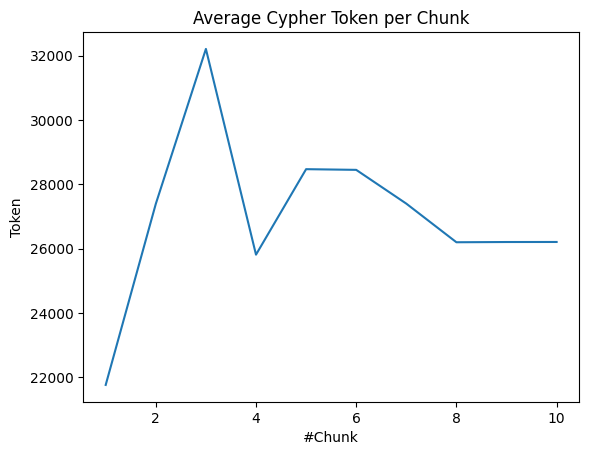

The chunk where the token value reaches 128000 is approximately 2616.93.


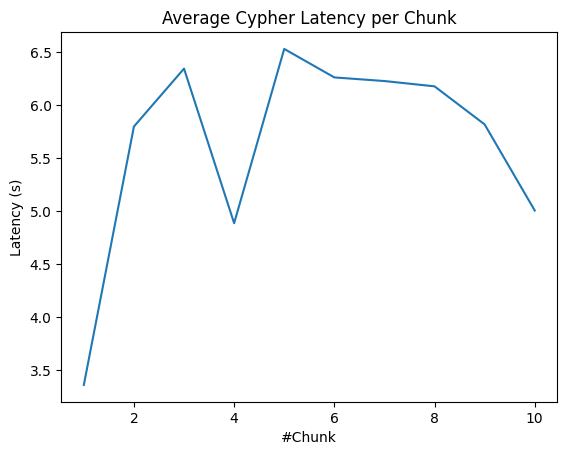

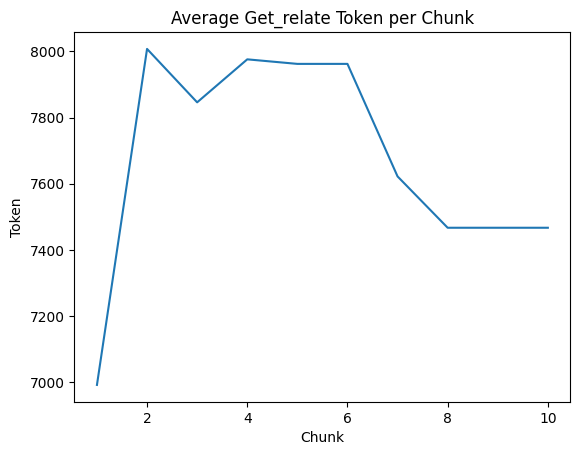

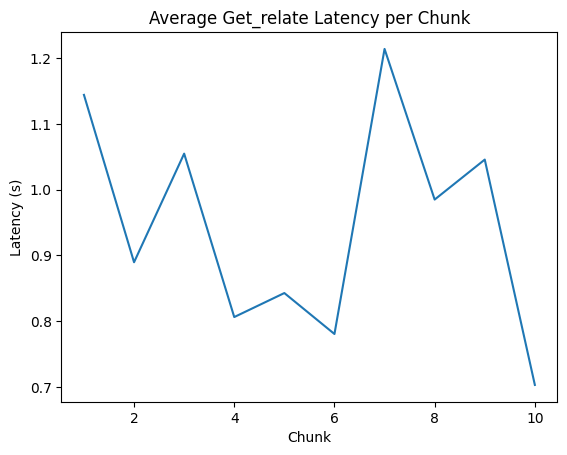

In [ ]:
test_service.get_metrics(
    df=df,
    max_tokens=128000,
    n_question=len(Question_list),
    relate_latency=relate_latency,
    relate_token=relate_token,
    # n_chunks=len(docs)
)